# **CS985 and CS987 Assignment 2 : Kannada-MNIST Classification Problem**

#### **Team's name: Group O**

-   Chavinpat Naimee (201976778)
-   Chinnakrit Nitipornsri (201964692)
-   Kittanon Na Nakhon (201964002)
-   Nuallahong Silaung (201986533)

Open in Google Colab [Click here](https://drive.google.com/file/d/1OmYWDHnR2-8Hyo19Y_pdIXcR6JFJ6Lui/view?usp=sharing) or https://drive.google.com/file/d/1OmYWDHnR2-8Hyo19Y_pdIXcR6JFJ6Lui/view?usp=sharing

## **1. The Objective :**
The main analysis of this project is to classify images of hand written digits in the data coming from Kannada, which is a language spoken predominantly by people of Karnataka in southwestern India. (The data comes from Classification problem: https://www.kaggle.com/t/e224c14938ae4525a2ff60b9cb846de6) 

## **2. Meaning of Dataset :**
This dataset consists of two datasets of the train and test dataset, which indicates the data of 60,000 rows 786 columns and 10,000 rows 786 columns respectively. However, the missing column of the test dataset is "label" column, which is the key finding of this project.


## **3. Overall analysis :**

> ### **3.1 Data Exploding**

> ### **3.2 Prepare the Data for Deep Learning Algorithms**
- Preparing data
- Spliting the train data and segment test data
- Normalising data
- Showing image data

> ### **3.3 Deep Learning Analysis Models**
- Creating a Fully Connected Neural Network model
- Improving a Fully Connected Neural Network model
- The Convolutional Neural Network (CNN)
- Improving the accuracy by using Data Augmentation technique
- CNN Architecture Improvement

## **4. Conclusion**
## **5. References**

> #### **Required packages**
- from google.colab import files
- import numpy as np
- import pandas as pd
- import matplotlib.pyplot as plt
- import sklearn
- from sklearn import model_selection, preprocessing
- from sklearn.preprocessing import scale
- from sklearn.model_selection import train_test_split
- import tensorflow as tf
- from tensorflow import keras
- from keras.models import Sequential, load_model
- from keras.layers import Dense, Dropout, Flatten
- from keras.layers import Conv2D, MaxPooling2D
- from keras import backend as K
- from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta,SGD
- from keras.preprocessing.image import ImageDataGenerator
- from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# **3. Overall analysis**

## **3.1 Data Exploding**

#### **3.1.1 Starting with import libraries and datasets**

##### ***In term of running on Google colab***

If you use Google colab to run this code, you need the API from Kaggle before run it.

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chinnakritn","key":"1e82857533b2b1c8622562ac08a53ea1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
#!pip install tensorflow==1.14.0

In [0]:
#!python3 -m pip install --upgrade tensorflow

In [0]:
!kaggle competitions download -c cs98x-kannada-mnist --force

  0% 0.00/1.79M [00:00<?, ?B/s]
100% 1.79M/1.79M [00:00<00:00, 58.9MB/s]
 60% 6.00M/9.92M [00:00<00:00, 10.7MB/s]
100% 9.92M/9.92M [00:00<00:00, 18.4MB/s]


In [0]:
import numpy as np   # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis
import tensorflow as tf # for create deep learning models
from tensorflow import keras # implementation of the Keras API specification
# load training & test datasets
train = pd.read_csv("/content/training.csv.zip")
test = pd.read_csv("/content/test.csv.zip")

##### ***In term of running on Jupyter Notebook***





In [0]:
import numpy as np   # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis
import tensorflow as tf # for create deep learning models
from tensorflow import keras # implementation of the Keras API specification

In [0]:
# To check version of tensorflow and keras
print('Tensorflow version',tf.__version__)
print('Keras version',keras.__version__)

In [0]:
# Read training & test datasets by pandas package
train = pd.read_csv("./cs98x-kannada-mnist/training.csv")
test = pd.read_csv("./cs98x-kannada-mnist/test.csv")

#### **3.1.2 Providing an overview of information of both datasets**

In [0]:
# To show 10 first order of train dataset
train.head(10)

,id,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Print shape of train set
train.shape

(60000, 786)

In [0]:
# To get Number of columns, Index, Datatype and Memory information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, id to pixel783
dtypes: int64(786)
memory usage: 359.8 MB


In [0]:
# To find and count 'NaN' in datasat
train.isnull().sum()

id          0
label       0
pixel0      0
pixel1      0
pixel2      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 786, dtype: int64

In [0]:
# To show 10 first order of test dataset
test.head(10)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,60001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,60002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,60006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,60007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,60008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,60009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,60010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Print shape of test set
test.shape

(10000, 785)

In [0]:
# To get Number of columns, Index, Datatype and Memory information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, id to pixel783
dtypes: int64(785)
memory usage: 59.9 MB


In [0]:
# To find and count 'NaN' in datasat
test.isnull().sum()

id          0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

#### **3.1.3 Reflection on Data Exploding**

In this section, it can be seen that dataset is entirely perfect, which is not have any missing or non-null values. However, some of deep learning algorithms required input data as images format. Hence, the data should be prepared by reshaping shape for the next step.

## **3.2 Prepare the Data for Deep Learning Algorithms**

#### **3.2.1 Preparing Data**

Some of the deep learning models required the MNIST dataset as 784 inputs; some required an images format as 28x28 pixels. Therefore, to segment train and test variables, they should be separated to segment the input data into the flattened data and image data.

##### **3.2.1.1 Input as flatten data**

In [0]:
# Create a copy of data that does not affect to original trian and test set
train_f = train.copy()
test_f = test.copy()

X_f = train_f.values[:,2:]            # Segment train output variables
Y_f = train_f.loc[:,'label'].values   # Segment train input variables
X_test_f = test_f.values[:,1:]        # Segment test input variables

In [0]:
print(X_f.shape)
print(X_test_f.shape)

(60000, 784)
(10000, 784)


##### **3.2.1.2 Input as image data**

In [0]:
# Create a copy of data that does not affect to original trian and test set
train_i = train.copy()
test_i = test.copy()

X_i = train_i.values[:,2:]            # Segment train output variables
Y_i = train_i.loc[:,'label'].values   # Segment train input variables
X_testing_i = test_i.values[:,1:]        # Segment test input variables

In [0]:
print(X_i.shape)
print(X_testing_i.shape)

(60000, 784)
(10000, 784)


In [0]:
X_i = np.array(X_i).reshape(60000,28, 28)
X_testing_i = np.array(X_testing_i).reshape(10000,28, 28)

In [0]:
print(X_i.shape)
print(X_testing_i.shape)

(60000, 28, 28)
(10000, 28, 28)


#### **3.2.2 Spliting the train data and segment test data**

According to the obstruction of the testing dataset, it has no target column of the label. Therefore, the training dataset has to be used as both training and testing. However, the evaluation of a model skill only the training dataset would result in a biased score. To avoid prediction bias of the dataset, it has to split into three datasets that are training, validation and testing set—starting from separate both datasets into training data and validation data as 70% and 30% respectively.

- The training set is used for learning, that is to fit the parameters of the Classification.
- The validation set is used to tune the parameters of the Classification.
- The test set is used only to assess the performance of a fully-specified Classification.

In [0]:
import sklearn   # import tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn import model_selection, preprocessing  # import model selection and preprocessing
from sklearn.preprocessing import scale  # import data normalise tool
from sklearn.model_selection import train_test_split   # to divide dataset into train and test set

##### **3.2.2.1 Spliting for flatten data**

In [0]:
# Spliting train and validation set into 70:30 ratio
X_train_f, X_valid_f, Y_train_f, Y_valid_f = sklearn.model_selection.train_test_split(X_f, Y_f, test_size=0.30)

##### **3.2.2.2 Spliting for image data**

In [0]:
# Spliting train and validation set into 70:30 ratio
X_train_i, X_valid_i, Y_train_i, Y_valid_i = sklearn.model_selection.train_test_split(X_i, Y_i, test_size=0.30)

#### **3.2.3 Normalising data**

Using the MNIST dataset, the value of this dataset is between 0-255 (single grayscale). Therefore, for using the Gradient Descent, the datasets have to adjust values measured on different scales to a notionally standard scale. If not, this would produce math range errors with the sigmoid function as the data is more massive negative values would be produced on a later layer. This process is known as "normalisation". Furthermore, it adjusted a range of the pixel data into [0,1] by dividing by 255.0 before it input into algorithms, and also converts them to floats.

##### **3.2.3.1 Normalisation flatten data**



In [0]:
# Normalisation scale of X_train and X_valid
X_train_f = X_train_f/255
X_valid_f = X_valid_f/255
Y_train_f = Y_train_f
Y_valid_f = Y_valid_f

In [0]:
# Re-ckeck shape again after Normalisation
print ("Number of training examples = " + str(X_train_f.shape[1]))
print ("Number of test examples = " + str(X_test_f.shape[1]))
print ("X_train_f shape: " + str(X_train_f.shape))
print ("Y_train_f shape: " + str(Y_train_f.shape))
print ("X_valid_f shape: " + str(X_valid_f.shape))
print ("Y_valid_f shape: " + str(Y_valid_f.shape))
print ("X_test_f shape: " + str(X_test_f.shape))

Number of training examples = 784
Number of test examples = 784
X_train_f shape: (42000, 784)
Y_train_f shape: (42000,)
X_valid_f shape: (18000, 784)
Y_valid_f shape: (18000,)
X_test_f shape: (10000, 784)


In [0]:
# Re-ckeck type again after Normalisation
print ("X_train_f dtype: " + str(X_train_f.dtype))
print ("Y_train_f dtype: " + str(Y_train_f.dtype))
print ("X_valid_f dtype: " + str(X_valid_f.dtype))
print ("Y_valid_f dtype: " + str(Y_valid_f.dtype))
print ("X_test_f dtype: " + str(X_test_f.dtype))

X_train_f dtype: float64
Y_train_f dtype: int64
X_valid_f dtype: float64
Y_valid_f dtype: int64
X_test_f dtype: int64


##### **3.2.3.2 Reshape and Normalisation image data**


In [0]:
img_rows, img_cols = X_i.shape[1], X_i.shape[1]

# Reshape the image 
X_train_i = X_train_i.reshape(X_train_i.shape[0], img_rows, img_cols, 1)
X_valid_i = X_valid_i.reshape(X_valid_i.shape[0], img_rows, img_cols, 1)
X_test_i = X_testing_i.reshape(X_testing_i.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)  

X_train_i = X_train_i.astype('float32')
X_valid_i = X_valid_i.astype('float32')
X_test_i = X_test_i.astype('float32')

# Normalisation scale of X_train and X_valid
X_train_i = X_train_i/255
X_valid_i = X_valid_i/255
X_test_i = X_test_i/255
Y_train_i = Y_train_i
Y_valid_i = Y_valid_i
print('x_train shape:', X_train_i.shape)
print(X_train_i.shape[0], 'train samples')
print(X_valid_i.shape[0], 'validation samples')
print(X_test_i.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 10
Y_train_i = keras.utils.to_categorical(Y_train_i, num_classes)
Y_valid_i = keras.utils.to_categorical(Y_valid_i, num_classes)

x_train shape: (42000, 28, 28, 1)
42000 train samples
18000 validation samples
10000 test samples


In [0]:
# Re-ckeck shape again after Normalisation
print ("Number of training examples = " + str(X_train_i.shape[1:3]))
print ("Number of test examples = " + str(X_test_i.shape[1:3]))
print ("X_train_i shape: " + str(X_train_i.shape))
print ("Y_train_i shape: " + str(Y_train_i.shape))
print ("X_valid_i shape: " + str(X_valid_i.shape))
print ("Y_valid_i shape: " + str(Y_valid_i.shape))
print ("X_test_i shape: " + str(X_test_i.shape))

Number of training examples = (28, 28)
Number of test examples = (28, 28)
X_train_i shape: (42000, 28, 28, 1)
Y_train_i shape: (42000, 10)
X_valid_i shape: (18000, 28, 28, 1)
Y_valid_i shape: (18000, 10)
X_test_i shape: (10000, 28, 28, 1)


In [0]:
# Re-ckeck type again after Normalisation
print ("X_train_i dtype: " + str(X_train_i.dtype))
print ("Y_train_i dtype: " + str(Y_train_i.dtype))
print ("X_valid_i dtype: " + str(X_valid_i.dtype))
print ("Y_valid_i dtype: " + str(Y_valid_i.dtype))
print ("X_test_i dtype: " + str(X_test_i.dtype))

X_train_i dtype: float32
Y_train_i dtype: float32
X_valid_i dtype: float32
Y_valid_i dtype: float32
X_test_i dtype: float32


#### **3.2.4 Showing image data**

In [0]:
# Python 2D plotting library and it's numerical mathematics extension NumPy
import matplotlib.pyplot as plt  

(60000, 28, 28)


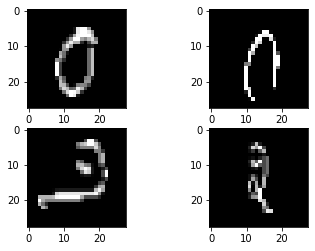

In [0]:
print(X_i.shape)
plt.subplot(221)
plt.imshow(X_i[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_i[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_i[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_i[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

(10000, 28, 28)


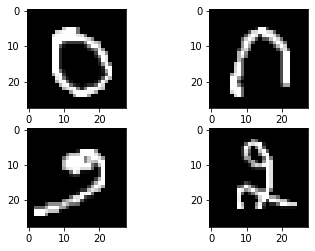

In [0]:
import matplotlib.pyplot as plt   # Python 2D plotting library and it's numerical mathematics extension NumPy

print(X_testing_i.shape)
plt.subplot(221)
plt.imshow(X_testing_i[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_testing_i[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_testing_i[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_testing_i[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## **3.3 Deep Learning Analysis Models**

#### **3.3.1 Creating a Fully Connected Neural Network model**

Firstly, we will start with a Fully Connected Neural Network model, which is the beginning choice to start implementing. Traditionally, the neural networks have three types of layer, which are input layer, hidden layer and output layer. For input layer, Fully Connected Neural Network have to input as a Flatten layer so that the input shape should be all columns in training dataset. Next layer is hidden layer. However, first thing to deal with these dense layers is to consider structure of each factor. There are two decisions, which are how many hidden layers actually to have in the neural networks and how many neurons would be in each of these layers.

According to this, using too few neurons would result in the underfitting result. In the other hand, using too many neurons could result in an overfitting result or waste of time-consuming. Hence, before starting model, Heaton (2015) said that there are some rule-of-thumb methods for determining an adequate number of neurons in the hidden layers, which is better than trial and error from throwing a random number at the start modelling as the following:

- The number of the hidden neurons should be between the size of input layer and the size of output layer.
- The number of the hidden neurons should be two-thirds of the size of input layer, plus the size of output layer.
- The number of the hidden neurons should be less than twice the size of input layer.


In this project, the last rule-of-thumb methods are chosen, which provide less number of neurons and less running-time. Thus, the first hidden layer is set as 392 neurons. Furthermore, other hidden layers normally are added as half of the first hidden layer, which is 196 neurons until the last hidden layer.

Moreover, using the "Relu" activation function to all of the hidden layers to avoid the Vanishing Gradients problem and to improve the flow of gradients through the model as well. The "softmax" activation function is a frequently appended to the last layer of an image classification, which can interpret the numeric output of the last hidden layer of multi-class classification into probabilities and guarantee that the output probabilities would be in a range of 0 and 1 and all sum up to 1 by taking the delegates of each output. Then, it will normalise each number by summing exponents so that all probabilities would be added up to one. Furthermore, this function could predict the class with the highest estimated probability and gives some perspective, which is suitable for interpreting probabilities for the categories.

For compiling model, the loss functions and optimisers should also be considered. Referring to the project target, it is not a binary target so that using the sparse_categorical_crossentropy loss is better for integer targets. Moreover, the optimiser is the main approach used for training a model to minimise the error rate. There are two types of optimiser for making a decision. The first one is Stochastic Gradient Descent (SGD), which is the most common method used to optimise deep learning networks. Another one is the Adaptive Moment Estimation (Adam). It has a dynamic bound of the learning rate, which illustrates a faster convergence and better generalisation than SGD optimise. However, Adam does not always give better training performance in every solution. Therefore, this project would produce both optimisers in the difference epochs, then analyse the result in the further term.

##### **3.3.1.1 Using Stochastic Gradient Descent (SGD) optimiser**

In [0]:
# Create a copy of data that does not affect to original trian and test set
X_train = X_train_f.copy()
X_valid = X_valid_f.copy()
Y_train = Y_train_f.copy()
Y_valid = Y_valid_f.copy()
X_test = X_test_f.copy()

In [0]:
# Define keys factors
image_size = X_train.shape[1]
num_classes = 10                # Number of classification target

In [0]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
# Perform input layer, hidden layer, and out put layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=image_size),                               
    tf.keras.layers.Dense(units=392, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation = 'softmax')
])

In [0]:
# Displays all model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_2 (Dense)              (None, 196)               38612     
_________________________________________________________________
dense_3 (Dense)              (None, 196)               38612     
_________________________________________________________________
dense_4 (Dense)              (None, 196)               38612     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1970      
Total params: 502,554
Trainable params: 502,554
Non-trainable params: 0
__________________________________________________

In [0]:
# Get a model's list of layers
model.layers

In [0]:
# Specify weights & biases of each layers
weights_in, biases_in = model.layers[0].get_weights()
weights_h1, biases_h1 = model.layers[1].get_weights()
weights_h2, biases_h2 = model.layers[2].get_weights()
weights_h3, biases_h3 = model.layers[3].get_weights()
weights_h4, biases_h4 = model.layers[4].get_weights()
weights_h5, biases_h5 = model.layers[5].get_weights()

In [0]:
# Compiling the model by using SGD
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta,SGD

optimizer = SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

##### ***Training the Model***

The numbers of epochs are related to how diverse the dataset. As the number of epochs increases, more number of times the weight is changed, the curve could be interpreted as underfitting to optimal to overfitting curve. However, we will set high epochs of SGD at 160 as initial epochs.

In [0]:
# Training model of validation
history = model.fit(X_train, Y_train, epochs=160, validation_data=(X_valid, Y_valid))

Epoch 1/160
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9264 - accuracy: 0.7342 - val_loss: 0.2657 - val_accuracy: 0.9227
Epoch 2/160
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2317 - accuracy: 0.9324 - val_loss: 0.2188 - val_accuracy: 0.9360
Epoch 3/160
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1821 - accuracy: 0.9483 - val_loss: 0.1796 - val_accuracy: 0.9493
Epoch 4/160
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1516 - accuracy: 0.9580 - val_loss: 0.1727 - val_accuracy: 0.9506
Epoch 5/160
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1302 - accuracy: 0.9629 - val_loss: 0.1605 - val_accuracy: 0.9547
Epoch 6/160
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1109 - accuracy: 0.9688 - val_loss: 0.1497 - val_accuracy: 0.9561
Epoch 7/160
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0949 - accuracy: 0.9741 - val_loss: 0.1416 - val_ac

##### ***Evaluating the Model***

From the learning curve graph, it provides the comparison between loss and accuracy of training and validation set by changing the model accuracy and number of epochs. It could be seen that both training and validation accuracy are increasing while the loss of both sets are decreasing. However, the validation loss curve is close to the training curve only before approximately 5 epochs, which means the number of epochs more than 5 is overfitting. Moreover, it could be interpreted that the model would not end up the better accuracy on higher epochs. For this model, the best accuracy provide 96.99% with 0.2092 loss.

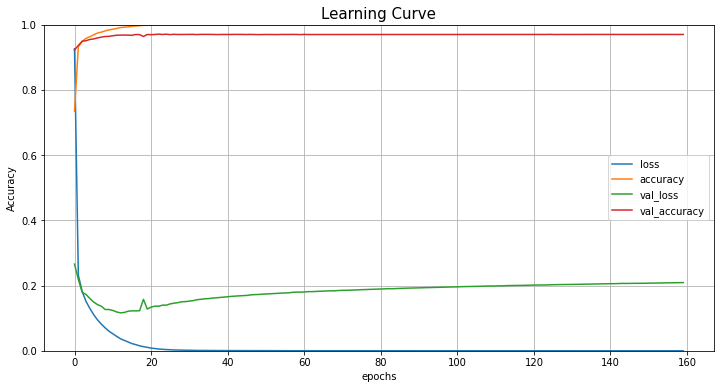

In [0]:
# Plot Learning curve
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning Curve', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
model.evaluate(X_valid, Y_valid)

563/563 [==============================] - 1s 2ms/step - loss: 0.2092 - accuracy: 0.9699


[0.2091594934463501, 0.9698888659477234]

##### ***Making prediction***

In [0]:
predictions_test = model.predict_classes(X_test)
predictions_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 2, ..., 8, 9, 9])

##### **3.3.1.2 Using Adaptive Moment Estimation (Adam)**

In [0]:
# Create a copy of data that does not affect to original trian and test set
X_train = X_train_f.copy()
X_valid = X_valid_f.copy()
Y_train = Y_train_f.copy()
Y_valid = Y_valid_f.copy()
X_test = X_test_f.copy()

In [0]:
# Define keys factors
image_size = X_train.shape[1]
num_classes = 10                # Number of classification target

In [0]:
# Perform input layer, hidden layer, and out put layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=image_size),                               
    tf.keras.layers.Dense(units=392, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation = 'softmax')
])

In [0]:
# Displays all model's layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_7 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_8 (Dense)              (None, 196)               38612     
_________________________________________________________________
dense_9 (Dense)              (None, 196)               38612     
_________________________________________________________________
dense_10 (Dense)             (None, 196)               38612     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1970      
Total params: 502,554
Trainable params: 502,554
Non-trainable params: 0
________________________________________________

In [0]:
# Get a model's list of layers
model.layers

In [0]:
# Specify weights & biases of each layers
weights_in, biases_in = model.layers[0].get_weights()
weights_h1, biases_h1 = model.layers[1].get_weights()
weights_h2, biases_h2 = model.layers[2].get_weights()
weights_h3, biases_h3 = model.layers[3].get_weights()
weights_h4, biases_h4 = model.layers[4].get_weights()
weights_h5, biases_h5 = model.layers[5].get_weights()

In [0]:
# Compiling the model by using Adam
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

##### ***Training the Model***

In this section, the epochs of Adam would be used less than SGD, which is 40 epochs.

In [0]:
# Training model of validation
history = model.fit(X_train, Y_train, epochs=40, validation_data=(X_valid, Y_valid))

Epoch 1/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2216 - accuracy: 0.9349 - val_loss: 0.1520 - val_accuracy: 0.9573
Epoch 2/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0958 - accuracy: 0.9729 - val_loss: 0.1185 - val_accuracy: 0.9666
Epoch 3/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.1319 - val_accuracy: 0.9640
Epoch 4/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0520 - accuracy: 0.9850 - val_loss: 0.1147 - val_accuracy: 0.9723
Epoch 5/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.1059 - val_accuracy: 0.9760
Epoch 6/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0338 - accuracy: 0.9902 - val_loss: 0.1199 - val_accuracy: 0.9747
Epoch 7/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0281 - accuracy: 0.9925 - val_loss: 0.1198 - val_accuracy:

##### ***Evaluating the Model***

From the learning curve graph, It could be seen that the tend of curve is similar to the SGD optimiser. However, it shows a better result, which the best accuracy provide 97.73% with 0.2038 loss.

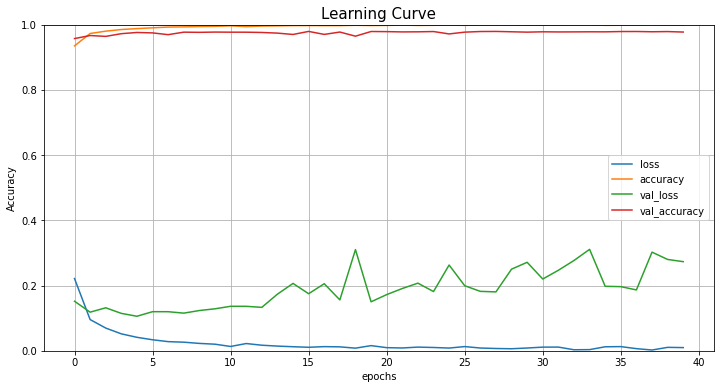

In [0]:
# Plot Learning curve
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning Curve', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
model.evaluate(X_valid, Y_valid)

563/563 [==============================] - 1s 2ms/step - loss: 0.2733 - accuracy: 0.9773


[0.2732917070388794, 0.9772777557373047]

##### ***Making Prediction***

In [0]:
predictions_test = model.predict_classes(X_test)
predictions_test

array([0, 1, 2, ..., 8, 9, 9])

#### **3.3.2 Improving a Fully Connected Neural Network model**

Using a model Regularisation is one of the methods to improve the accuracy of the model. The dropout technique will be used, which might boost the accuracy of approximately 1-2% of the model. Referring to the last section, Adam optimiser provides better accuracy than SGD. Therefore, Adam is chosen to run this section.

In [0]:
# Create a copy of data that does not affect to original trian and test set
X_train = X_train_f.copy()
X_valid = X_valid_f.copy()
Y_train = Y_train_f.copy()
Y_valid = Y_valid_f.copy()
X_test = X_test_f.copy()

In [0]:
# Define keys factors
image_size = X_train.shape[1]
num_classes = 10                # Number of classification target

In [0]:
# Perform input layer, hidden layer, and out put layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=image_size),                               
    tf.keras.layers.Dense(units=392, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=196, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=num_classes, activation = 'softmax')
])

In [0]:
# Displays all model's layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout (Dropout)            (None, 392)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_1 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 196)               38612     
_________________________________________________________________
dropout_2 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 196)              

In [0]:
# Get a model's list of layers
model.layers

In [0]:
# Compiling the model by using Adam
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

##### ***Training the Model***

In [0]:
# Training model of validation
history = model.fit(X_train, Y_train, epochs=40, validation_data=(X_valid, Y_valid))

Epoch 1/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3680 - accuracy: 0.8888 - val_loss: 0.1567 - val_accuracy: 0.9549
Epoch 2/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1630 - accuracy: 0.9558 - val_loss: 0.1241 - val_accuracy: 0.9644
Epoch 3/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1311 - accuracy: 0.9661 - val_loss: 0.1044 - val_accuracy: 0.9709
Epoch 4/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1069 - accuracy: 0.9719 - val_loss: 0.1026 - val_accuracy: 0.9741
Epoch 5/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0984 - accuracy: 0.9746 - val_loss: 0.0944 - val_accuracy: 0.9745
Epoch 6/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0823 - accuracy: 0.9786 - val_loss: 0.1046 - val_accuracy: 0.9741
Epoch 7/40
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0822 - accuracy: 0.9790 - val_loss: 0.0798 - val_accuracy:

##### ***Evaluating the Model***

It shows a better result as in theory, which provides an accuracy of 98.19% with 0.1360 loss.

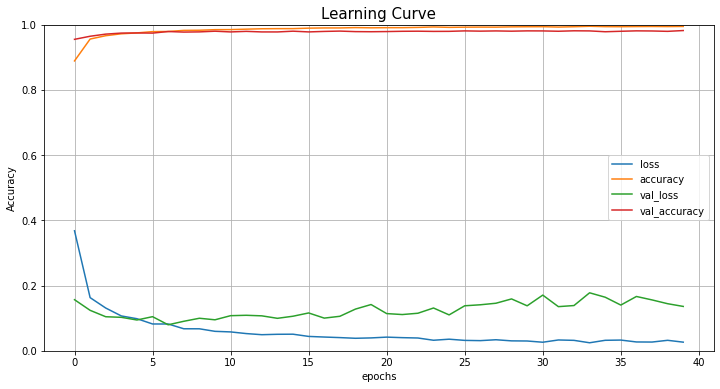

In [0]:
# Plot Learning curve
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning Curve', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
model.evaluate(X_valid, Y_valid)

563/563 [==============================] - 1s 2ms/step - loss: 0.1360 - accuracy: 0.9819


[0.13604997098445892, 0.9818888902664185]

##### ***Making prediction***

In [0]:
predictions_test = model.predict_classes(X_test)
predictions_test

array([0, 1, 2, ..., 8, 9, 9])

#### **3.3.3 The Convolutional Neural Network (CNN)**
Another model is called "Convolutional Neural Networks". It is a subset of deep neural network that widely used to analyse imagery. There are many architectures for the CNN approach. However, the excellent design should provide the highest accuracy, while computational complexity was minimised. The advantage of CNN method is parameters of CNN much less than a fully connected network. Thus, the computational complexity can be reduced. In this section would provide the way to predict by using CNN model from the testing set, which is provided in-class.


##### ***CNN Technique using LeNet-5 Architecture***
LeNet-5 model is one of the most well-known CNN architectures, and it was built by Yann LeCun in 1998. Many researchers used this architecture for hand-written digit recognition (MNIST) for the excellent results. The Kannada (MNIST) is similar to the MNIST, which can use the LeNet-5 to train our model.

##### ***Data Preparation for LeNet-5***
There are several important details for this architecture. The input of LeNet-5 is 32x32 pixels. Therefore, it can use zero-padding to this dataset to be 32x32 pixels. Padding technique can help to preserve information on the edge of pictures. However, the dataset should be normalised before feeding into the network.

[More detail about LeNet-5 architecture can be found here.](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

In [0]:
# Padding images with 0s
X_train_LeNet5 = np.pad(X_train_i, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_valid_LeNet5 = np.pad(X_valid_i, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test_LeNet5 = np.pad(X_test_i, ((0,0),(2,2),(2,2),(0,0)), 'constant')

Y_train_LeNet5 = Y_train_i
Y_valid_LeNet5 = Y_valid_i

print("Updated Image Shape: {}".format(X_train_LeNet5[0].shape))

Updated Image Shape: (32, 32, 1)


#### **Hyperparameters Fine-Tuning for CNN Approach**

- ***Learning Rate***: One of the most critical hyperparameters is the learning rate. Generally speaking, the average learning rate is about half the actual learning rate.

- ***Batch Size***: The batch size will have a significant effect on the efficiency and training time of your model. Furthermore, the optimum batch size would usually be smaller than 32, in April 2018, Yann Lecun said that "Friends don't let friends use mini-batches greater than 32".

- ***The number of training iterations***: In many cases, the iteration number does not seem necessary because of the early stopping technique. For more details about early stopping can be found below.

In [0]:
# Perform layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

# Displays all model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

##### ***Compiling and Fitting the Model***

A number of batch size and epochs for CNN will be discussed in the following part. However, we will start using batch size is 128 with 100 epochs to train our model.

In [0]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [0]:
batch_size = 128
epochs = 200

history_LeNet5 = model.fit(X_train_LeNet5, Y_train_LeNet5,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid_LeNet5, Y_valid_LeNet5))
          #callbacks=[learning_rate_reduction,es])

Epoch 1/200
329/329 [==============================] - 1s 4ms/step - loss: 0.4229 - accuracy: 0.8880 - val_loss: 0.1688 - val_accuracy: 0.9537
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.1240 - accuracy: 0.9640 - val_loss: 0.1088 - val_accuracy: 0.9702
Epoch 3/200
329/329 [==============================] - 1s 4ms/step - loss: 0.0877 - accuracy: 0.9737 - val_loss: 0.0854 - val_accuracy: 0.9758
Epoch 4/200
329/329 [==============================] - 1s 4ms/step - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.0763 - val_accuracy: 0.9769
Epoch 5/200
329/329 [==============================] - 1s 4ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0681 - val_accuracy: 0.9804
Epoch 6/200
329/329 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0647 - val_accuracy: 0.9803
Epoch 7/200
329/329 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9855 - val_loss: 0.0571 - val_accuracy: 0.9827

##### ***Evaluating the Model***

From the learning curve graph below, It can be noticed that there is a fluctuation of validation accuracy and validation loss while training the model. It seems the SGD optimiser does not work well with this model. However, it provided the validation accuracy at 98.91%. In the following part, we will apply the data augmentation and observe the differences.

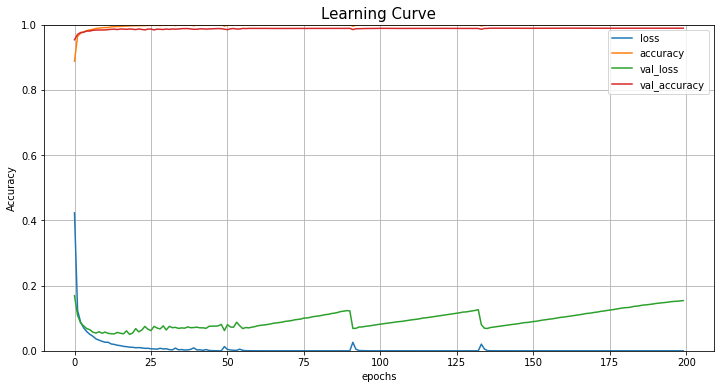

In [0]:
# Plot Learning curve
pd.DataFrame(history_LeNet5.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning Curve', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

##### ***Making prediction***

In [0]:
predictions_test = model.predict_classes(X_test_LeNet5)
predictions_test

array([0, 1, 2, ..., 8, 9, 9])

#### **3.3.4 Improving the accuracy by using Data Augmentation technique**

Data augmentation is used to increase the size of the training set by creating a several practical variants of each training sample. Furthermore, this is a regularisation technique that can reduce over-fitting. There are many ways to generate a new image, such as random cropping, rotation, translation, rescale, shearing, colour shifting, etc. Hence, the "ImageDataGenerator" fuction from Keras is used for data augmentation technique. 

[More details on ImageDataGenerator and their parameters](https://keras.io/preprocessing/image/)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_augmentation = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.25,
                                   horizontal_flip = False)

valid_augmentation = ImageDataGenerator() 

Using TensorFlow backend.


##### ***Early Stopping***
Early stopping method will be applied when the model is being fit. This technique is to stop training as soon as the validation error reaches a minimum. It is one of the most efficient regularisation method Geoffrey Hinton called it as a "beautiful free lunch".

In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300, restore_best_weights=True)

##### ***Learning Rate Reduction***
The learning rate reduction is used to make the optimiser converge faster and closer to the global minimum. This function can help to decrease the learning rate during the training to meet the global loss function minimum efficiently. 

We reduce the learning rate by half if the accuracy does not improve after 3 epochs using the ReduceLROnPlateau function from Keras.callbacks to.

In [0]:
# Set a learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

##### ***Fitting the Model***
This experiment used model, parameters and optimiser from the previous section. You will see the improvement of the classifier. 

In [0]:
# Perform layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Displays all model's layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [0]:
batch_size = 128
epochs = 200

history = model.fit_generator(train_augmentation.flow(X_train_LeNet5, Y_train_LeNet5, batch_size=batch_size),
                              steps_per_epoch=len(X_train_LeNet5)//batch_size,
                              epochs=epochs,
                              validation_data=(X_valid_LeNet5, Y_valid_LeNet5),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
328/328 - 10s - loss: 1.2159 - accuracy: 0.5915 - val_loss: 0.4076 - val_accuracy: 0.8823 - lr: 0.0010
Epoch 2/200
328/328 - 10s - loss: 0.5780 - accuracy: 0.8203 - val_loss: 0.2495 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 3/200
328/328 - 10s - loss: 0.4626 - accuracy: 0.8562 - val_loss: 0.1830 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 4/200
328/328 - 10s - loss: 0.3972 - accuracy: 0.8771 - val_loss: 0.1720 - val_accuracy: 0.9537 - lr: 0.0010
Epoch 5/200
328/328 - 10s - loss: 0.3623 - accuracy: 0.8862 - val_loss: 0.1641 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 6/200
328/328 - 10s - loss: 0.3324 - accuracy: 0.8971 - val_loss: 0.1413 - val_accuracy: 0.9593 - lr: 0.0010
Epoch 7/200
328/328 - 10s - loss: 0.3099 - accuracy: 0.9032 - val_loss: 0.1408 - val_accuracy: 0.9577 - lr: 0.0010
Epoch 8/200
328/328 - 10s - loss: 0.2916 - accuracy: 0.9087 - val_loss: 0.1159 - val_accuracy: 0.9651 - lr: 0.0010
Epoc

##### ***Evaluating the Model***

From the learning curve graph below, It can be seen that the accuracy of both training and validation set converge and the accuracy was improve during the training of the model. As a reult, the validation accuracy is 99.14%.

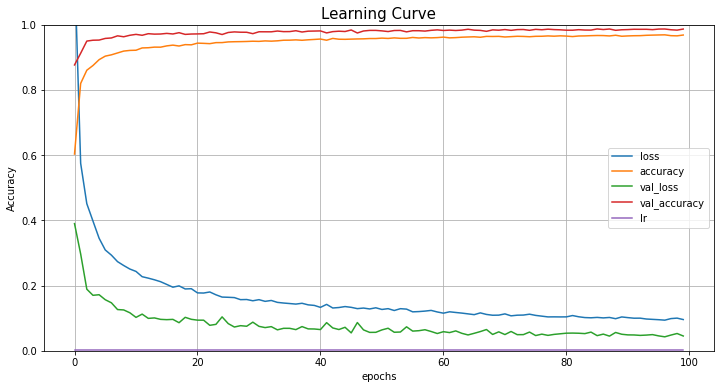

In [0]:
# Plot Learning curve
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning Curve', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

##### ***Making prediction***

In [0]:
predictions_test = model.predict_classes(X_test_LeNet5)
predictions_test

array([0, 1, 2, ..., 8, 9, 9])

#### **3.3.5 CNN Architecture Improvement**

The architecture that generated the highest accuracy that we found will be provided in the following. This model was taken from [25 Million Images! [0.99757] MNIST](https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist) in Kaggle.

This simple architecture starts with convolution layers, then follow by a pooling layer. Then another convolution layers and pooling were added. Then, finish with a dense layer and a SoftMax layer. There are some unique features in a model that can help improve the accuracy, that is pooling layers batch normalisation, and dropout. Batch normalisation would be added after the convolution layers to normalise the input of a hidden layer by scaling the activations. This can help to increase the training speed and regularise the model. Moreover, dropout technique is the powerful regularisation technique, which would be added to prevent the over-fitting problem. Therefore, for the model in this project, a number of the filter size, padding type and parameters of pooling, batch normalisation, dropout, activation function type will be adjusted by trial and error to maximise the accuracy of the testing set.

In [0]:
# Perform layers
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.Conv2D(128,kernel_size=5,strides=2,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Displays all model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0

##### ***Compiling and Fitting Model***
In compile model, we used the loss function as “categorical_crossentropy”, metric to evaluate model is “accuracy” and the optimiser would be “RMSprop”.

We have already experimented that RMSprop performs better than Adam and SGD optimiser. Adam optimiser learn faster, reach the minimum point faster, but gave the lower validation accuracy. While SGD seems does not work well with this model because it cannot reach the global minimum.

In [0]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)  # or learning_rate = 0.0025
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
batch_size = 128
epochs = 200

history = model.fit_generator(train_augmentation .flow(X_train_i, Y_train_i, batch_size=batch_size),
                              steps_per_epoch=len(X_train_i)//batch_size,
                              epochs=epochs,
                              validation_data=(X_valid_i, Y_valid_i),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=1)

##### ***Evaluating the Model***

From the learning curve graph below, It can be seen that the accuracy of both training and validation set converge to 1. This means the accuracy was improve during the training of the model. As a reult, the validation accuracy is 99.52%, which is our best score that we obtained.

In [0]:
# Plot Learning curve
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Learning Curve', fontsize=15)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

##### ***Making prediction***

In [0]:
predictions_test = model.predict_classes(X_test_i)
predictions_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 2, ..., 8, 9, 9])

# **4. Conclusions**

This task will train the model to predict the number of Kannada MNIST dataset using Deep Learning techniques. Fully Connected Network and Convolutional Neural Network (CNN) approach will be implemented. The benefit of the CNN is there are parameters less than Fully connected network method that can train a model faster.

In the fully connected network part, we obtained the outcomes that Adam optimiser learns faster than SGD, but SGD gives higher accuracy. Besides, a model regularisation can improve the efficiency of the model using dropout technique.

In the CNN approach, a proper architecture could contribute the better performance. Data augmentation is one of the most crucial techniques that affect the performance of the model. Moreover, the size of convolution layer, pooling layer, activation function, batch normalisation, decaying learning rate and dropout have an impact on the accuracy as well.

As a result, CNN performs outstanding accuracy, around 99.5%, while the highest accuracy of the Fully Connected network is approximately 98%.

We hope that this task will help you more understanding about Deep Learning in practical. We are exciting when we tried different parameters. Our suggestion is try to change other settings such as the number of filters, activation function type, and other parameters to build the model and observe the outcomes.

The following section is the summarise of our code that provided the best accuracy, and it will be submitted to Kaggle competition.

# **5. References**

- Heaton, J. (2015). AIFH, Volume 3: Deep Learning and Neural Networks.
- LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.

# **Submission Model**

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"chinnakritn","key":"1e82857533b2b1c8622562ac08a53ea1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Import libraries 
import numpy as np    # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis
import tensorflow as tf # for create deep learning models
from tensorflow import keras # implementation of the Keras API specification

In [0]:
# To check version of tensorflow and keras
print('Tensorflow version',tf.__version__)
print('Keras version',keras.__version__)

Tensorflow version 2.2.0-rc2
Keras version 2.3.0-tf


In [0]:
!kaggle competitions download -c cs98x-kannada-mnist --force

  0% 0.00/1.79M [00:00<?, ?B/s]
100% 1.79M/1.79M [00:00<00:00, 60.1MB/s]
 50% 5.00M/9.92M [00:00<00:00, 34.8MB/s]
100% 9.92M/9.92M [00:00<00:00, 46.5MB/s]


In [0]:
# load training & test datasets
train = pd.read_csv("/content/training.csv.zip")
test = pd.read_csv("/content/test.csv.zip")

In [0]:
# Create a copy of data that does not affect to original trian and test set
train_i = train.copy()
test_i = test.copy()

X_i = train_i.values[:,2:]            # Segment train output variables
Y_i = train_i.loc[:,'label'].values   # Segment train input variables
X_testing_i = test_i.values[:,1:]        # Segment test input variables

X_i = np.array(X_i).reshape(60000,28, 28)
X_testing_i = np.array(X_testing_i).reshape(10000,28, 28)

In [0]:
# import libraries
import sklearn   # import tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn import model_selection, preprocessing  # import model selection and preprocessing
from sklearn.preprocessing import scale  # import data normalise tool
from sklearn.model_selection import train_test_split   # to divide dataset into train and test set
import matplotlib.pyplot as plt 

In [0]:
# Spliting train and validation set into 70:30 ratio
X_train_i, X_valid_i, Y_train_i, Y_valid_i = sklearn.model_selection.train_test_split(X_i, Y_i, test_size=0.30)

In [0]:
# data preparation
img_rows, img_cols = X_i.shape[1], X_i.shape[1]

# Reshape the image 
X_train_i = X_train_i.reshape(X_train_i.shape[0], img_rows, img_cols, 1)
X_valid_i = X_valid_i.reshape(X_valid_i.shape[0], img_rows, img_cols, 1)
X_test_i = X_testing_i.reshape(X_testing_i.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)  

X_train_i = X_train_i.astype('float32')
X_valid_i = X_valid_i.astype('float32')
X_test_i = X_test_i.astype('float32')

# Normalisation scale of X_train and X_valid
X_train_i = X_train_i/255
X_valid_i = X_valid_i/255
X_test_i = X_test_i/255
Y_train_i = Y_train_i
Y_valid_i = Y_valid_i
print('x_train shape:', X_train_i.shape)
print(X_train_i.shape[0], 'train samples')
print(X_valid_i.shape[0], 'validation samples')
print(X_test_i.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 10
Y_train_i = keras.utils.to_categorical(Y_train_i, num_classes)
Y_valid_i = keras.utils.to_categorical(Y_valid_i, num_classes)

x_train shape: (42000, 28, 28, 1)
42000 train samples
18000 validation samples
10000 test samples


In [0]:
# create the model
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128,kernel_size=5,strides=2,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(256,kernel_size=3,activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256,kernel_size=3,activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256,kernel_size=5,strides=2,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile model
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9)  # or learning_rate = 0.0025
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [0]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
train_augmentation = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.25,
                                   horizontal_flip = False)
valid_augmentation = ImageDataGenerator() 

# Early stopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300, restore_best_weights=True)

# Set a learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
# fit model
batch_size = 128
epochs = 100

history = model.fit_generator(train_augmentation .flow(X_train_i, Y_train_i, batch_size=batch_size),
                              steps_per_epoch=len(X_train_i)//batch_size,
                              epochs=epochs,
                              validation_data=(X_valid_i, Y_valid_i),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=1)

Epoch 1/100
328/328 [==============================] - 20s 62ms/step - loss: 0.5343 - accuracy: 0.8251 - val_loss: 0.1945 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 2/100
328/328 [==============================] - 20s 62ms/step - loss: 0.1646 - accuracy: 0.9500 - val_loss: 0.0610 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 3/100
328/328 [==============================] - 20s 60ms/step - loss: 0.1273 - accuracy: 0.9601 - val_loss: 0.0415 - val_accuracy: 0.9890 - lr: 0.0010
Epoch 4/100
328/328 [==============================] - 20s 60ms/step - loss: 0.1127 - accuracy: 0.9659 - val_loss: 0.0402 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 5/100
328/328 [==============================] - 20s 60ms/step - loss: 0.0951 - accuracy: 0.9706 - val_loss: 0.0418 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 6/100
328/328 [==============================] - 20s 60ms/step - loss: 0.0893 - accuracy: 0.9724 - val_loss: 0.0465 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 7/100
328/328 [==============================]

To sum up, This model could give the bast accuracy at around 99.57% of validation set. However, when it was submitted to the Kaggle Competition "CS98X Kannada MNIST", it provided the accuracy score as 0.9840 or 98.40% accuracy.

In [0]:
# Predict the testing set
predictions_test = model.predict_classes(X_test_i)
predictions_test

array([0, 1, 2, ..., 8, 9, 9])

# **Submission Area**

In [0]:
test1 = test.copy()
test1["label"] = predictions_test

submission = test1[["id","label"]]
submission.to_csv("submission.csv", index=False)

In [0]:
!kaggle competitions submit -c cs98x-kannada-mnist -f submission.csv -m "Message"

100% 78.1k/78.1k [00:03<00:00, 20.9kB/s]
Successfully submitted to CS98X Kannada MNIST